In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('lebron_career.csv')
df.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus
0,1,2003-10-29,18-303,CLE,SAC,L (-14),42,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9
1,2,2003-10-30,18-304,CLE,PHO,L (-9),41,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3
2,3,2003-11-01,18-306,CLE,POR,L (-19),39,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21
3,4,2003-11-05,18-310,CLE,DEN,L (-4),41,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3
4,5,2003-11-07,18-312,CLE,IND,L (-1),44,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7


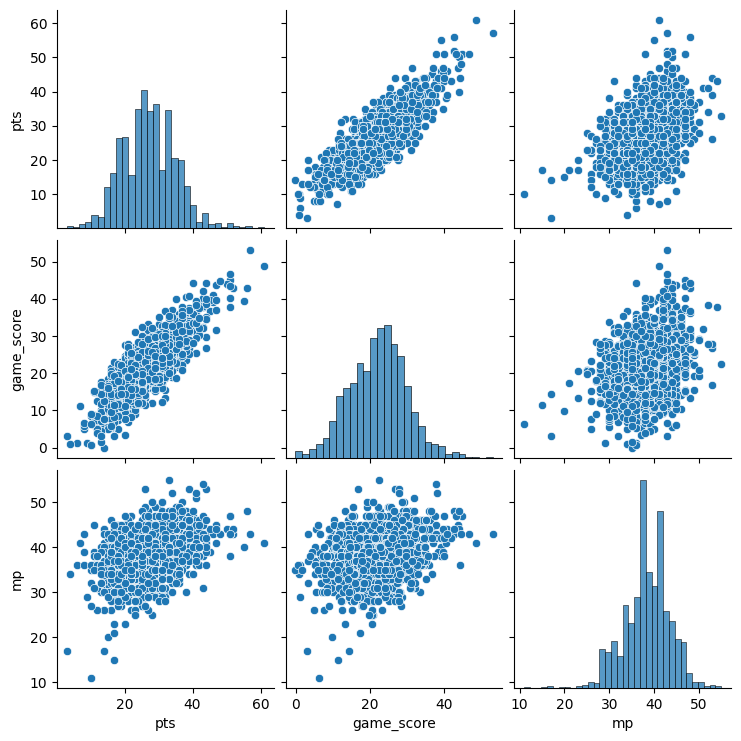

In [33]:
#Plot Age, Income and Spending Score Correlation
sns.pairplot(df[['pts','game_score', 'mp']])

In [34]:
# Creating clusters
kmeans = cluster.KMeans(n_clusters=4)
kmeans = kmeans.fit(df[['pts','mp']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
kmeans.cluster_centers_

array([[23.90909091, 41.14049587],
       [18.41558442, 33.08441558],
       [30.52513966, 36.92178771],
       [37.97457627, 43.33898305]])

In [37]:
df['Clusters'] = kmeans.labels_
df.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus,Clusters
0,1,2003-10-29,18-303,CLE,SAC,L (-14),42,12,20,0.600,...,4,6,9,4,0,2,25,24.7,-9,0
1,2,2003-10-30,18-304,CLE,PHO,L (-9),41,8,17,0.471,...,10,12,8,1,0,7,21,14.7,-3,0
2,3,2003-11-01,18-306,CLE,POR,L (-19),39,3,12,0.250,...,4,4,6,2,0,2,8,5.0,-21,1
3,4,2003-11-05,18-310,CLE,DEN,L (-4),41,3,11,0.273,...,9,11,7,2,3,2,7,11.2,-3,1
4,5,2003-11-07,18-312,CLE,IND,L (-1),44,8,18,0.444,...,5,5,3,0,0,7,23,9.0,-7,0


In [38]:
df['Clusters'].value_counts()

Clusters
0    363
2    358
1    308
3    236
Name: count, dtype: int64

<Axes: xlabel='game_score', ylabel='pts'>

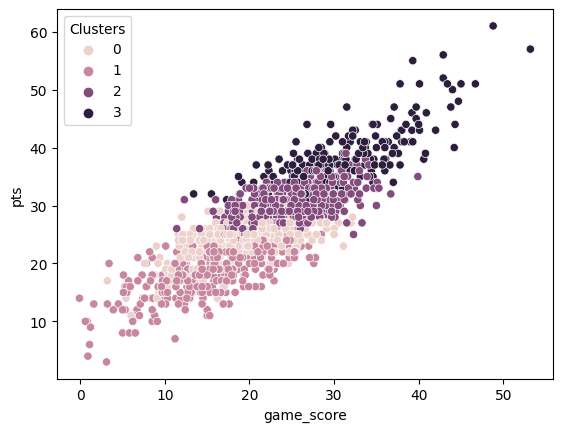

In [39]:
sns.scatterplot(x="game_score", y="pts",hue = 'Clusters',  data=df)

In [41]:
silhouette_avg = silhouette_score(df[['pts','game_score']], df['Clusters'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.11370255008472732


In [42]:
# Creating clusters
kmeans = cluster.KMeans(n_clusters=2)
kmeans = kmeans.fit(df[['pts','mp']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
kmeans.cluster_centers_

array([[21.02197802, 36.05180534],
       [33.20063694, 40.77229299]])

In [44]:
df['Clusters'] = kmeans.labels_
df.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus,Clusters
0,1,2003-10-29,18-303,CLE,SAC,L (-14),42,12,20,0.600,...,4,6,9,4,0,2,25,24.7,-9,0
1,2,2003-10-30,18-304,CLE,PHO,L (-9),41,8,17,0.471,...,10,12,8,1,0,7,21,14.7,-3,0
2,3,2003-11-01,18-306,CLE,POR,L (-19),39,3,12,0.250,...,4,4,6,2,0,2,8,5.0,-21,0
3,4,2003-11-05,18-310,CLE,DEN,L (-4),41,3,11,0.273,...,9,11,7,2,3,2,7,11.2,-3,0
4,5,2003-11-07,18-312,CLE,IND,L (-1),44,8,18,0.444,...,5,5,3,0,0,7,23,9.0,-7,0


<Axes: xlabel='game_score', ylabel='pts'>

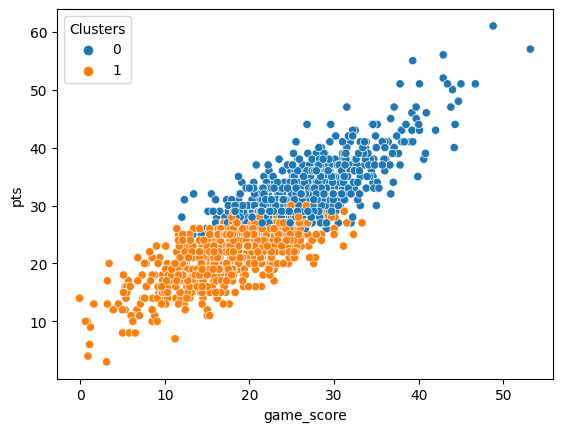

In [30]:
sns.scatterplot(x="game_score", y="pts",hue = 'Clusters',  data=df)

In [46]:
silhouette_avg = silhouette_score(df[['pts','game_score']], df['Clusters'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4081918638139714
